2019 1st ML month with KaKR
===
## [GUIDE, KOR, DG] 데이터 분석 어떻게 시작해야 하나요?
- 본 커널은, 2019 ML month 대구 튜토리얼을 위한 커널입니다.
- 출처 : https://www.kaggle.com/daehungwak/guide-kor-dg

### 위의 출처의 글을 보고 따라한 내용입니다 :)

## Contents
0. 데이터 분석 시작하기 앞서서
1. 데이터 셋 확인
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
3. 특성 공학 (Feature Engineering)
4. 모델 개발 및 학습
    A. scikit-learn을 사용한 RandomForest모델 개발
    B. keras를 사용한 NN 모델 개발 (미완)
5. 모델 예측 및 평가
    A. RandomForest 예측 및 평가
    B. NN 예측 및 평가 (미완)
6. 결론
7. 어떻게 공부하는게 좋을까요?

## 0. 데이터 분석 시작하기 앞서서
본 튜토리얼에선 파이썬의 다음과 같은 도구를 사용할 것입니다.
* 여러 시각화 도구 : matplotlib, seaborn, plotly
* 데이터 분석 도구 : pandas, numpy
* 모델 개발 도구 : sklearn, keras

해당 커널은 다음과 같은 프로세스로 진행됩니다.
1. 데이터 셋 확인
    * 데이터가 어떻게 구성되어 있는지 확인합니다.
    * 대부분의 캐글 데이터들은 잘 정제되어 있습니다.
    * 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
    * 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다.
    * 여러 시각화 툴을 사용하여 insight를 얻습니다.
3. 특성 공학 (Feature Engineering)
    * 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다.
    * one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
4. 모델 개발 및 학습
    * sklearn, keras 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을
    * 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 또 keras는 딥러닝 개발
    * 할 때 모델에 집중할 수 있도록 해줍니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을
    * 사용할 수 도 있습니다. 그리고 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다
5. 모델 예측 및 평가
    * Train set 을 가지고 모델을 학습시킨 후, Test set 을 가지고 prediction 합니다.
    * 그리고 예측 성능이 원하는 수준인지 판단합니다.
    * 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다.


## 1. 데이터셋 확인하기

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')
# 워닝 메시지 생략
# 차후 버전관리를 위해 필요한 정보라고 생각하고 주석처리

%matplotlib inline

In [62]:
os.listdir("/Users/ygkim003/develope/kaggle/data/titanic")

['test.csv', 'train.csv', 'sample_submission.csv']

In [63]:
df_train = pd.read_csv('/Users/ygkim003/develope/kaggle/data/titanic/train.csv')
df_test = pd.read_csv('/Users/ygkim003/develope/kaggle/data/titanic/test.csv')
df_submit = pd.read_csv('/Users/ygkim003/develope/kaggle/data/titanic/sample_submission.csv')

In [64]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

train할 데이터 수 891개,  
test(제출해야)할 데이터 수는 418개

In [65]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

column(feature)는 총 12개로 이루어져 있으며,  
학습에 사용해야 할 feature는 11개,  
예측해야 할 feature 는 `Survivied`이다

In [66]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

submit 파일은 2개의 feature로 구성되어져 있으며,  
어떤 사람인지 구분하는 `PassengerId`,  
해당 사람이 살았는지 죽었는지 구분하는 `Survived`

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


문제에서 다루는 feature  
Pclass, Age, SibSp, Parch, Fare 이며  
예측하려는 target label 은 Survived 이다.

### 타이타닉 데이터 Feature 설명
* survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
* pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex - 성별
* Age - 나이(세)
* sibsp - 함께 탑승한 형제자매, 배우자 수 총합
* parch - 함께 탑승한 부모, 자녀 수 총합
* ticket - 티켓 넘버
* fare - 탑승 요금
* cabin - 객실 넘버
* bembarked - 탑승 항구


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 결측치 (Null Data) 확인

In [73]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [75]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train set 과 test set 에 비슷하게 `Age` 피쳐에 약 20%,  
`Carbin` 피쳐에 약 80%의 결측치가 있음을 확인할 수 있다.

### 1.2 Target Label, `Survived`확인
target label 이 어떤 distribution을 가지고 있는 지 확인해봐야 한다.  
지금 같은 binary classification 문제의 경우에서,  
1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

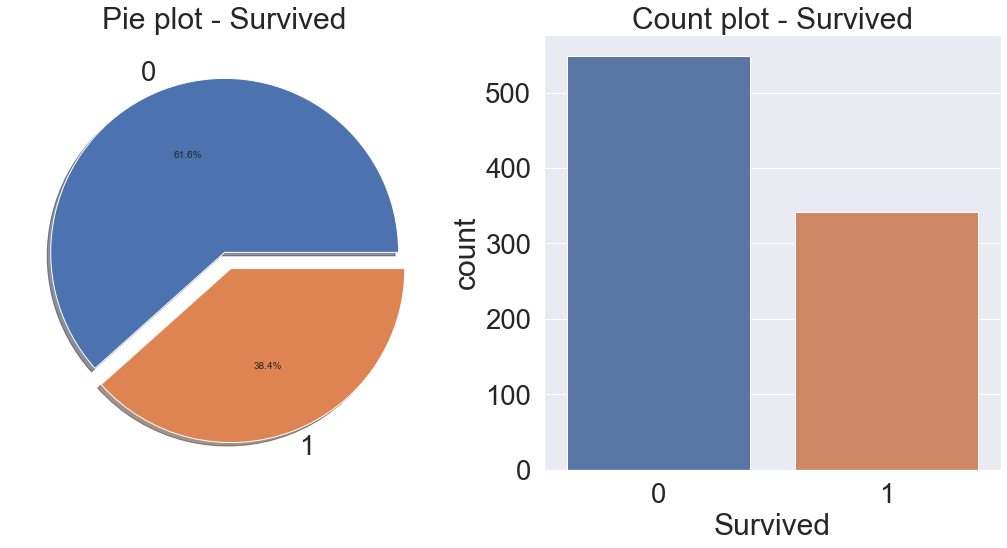

In [76]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie( \
         explode=[0, 0.1], autopct='%1.1f%%', \
         ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

target label 의 분포가 제법 균일(balanced)하다.  
불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는  
만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 된다.  
0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다.  
지금 문제에서는 그렇지 않으니 계속 진행. 

## 2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

데이터는 매우 많고, 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.  
시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다.  
특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.  

### 2.1 Pclass

먼저 Pclass 에 대해서 살펴보겠습니다.

* Pclass는 서수형 데이터입니다.  
    즉, 카테고리이면서 순서가 있는 데이터 타입입니다.  
    먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다.  
* 엑셀의 피벗 차트와 유사한 작업을 하게 되는데,  
    pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다.  
    또한 pivot 이라는 메소드도 있습니다.
* Pclass,Survived 를 가져온 후, pclass 로 묶습니다.
    그러고 나면 각 pclass 마다 0, 1 이 count가 되는데,  
    이를 평균내면 각 pclass 별 생존률이 나옵니다.  
* 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지  
    확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)  
    사람의 총합을 주게 됩니다


In [77]:
df_train['Pclass'].unique(), \
df_train['Pclass'].value_counts()

(array([3, 1, 2]),
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64)

In [78]:
# pcalss 그룹 별 데이터 카운트
group_pclass = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True)
group_pclass.sum()

,Survived
Pclass,
1,136
2,87
3,119


In [79]:
# 위와 같은 작업을 crosstab으로 편하게 가능
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [80]:
# mean은 생존률을 구하게 할 수 있음.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


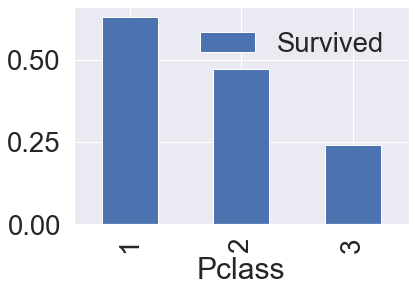

In [81]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

> 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며,  
> 나중에 모델을 새울 때 이 feature 를 사용하는 것이 좋다고 판단할 수 있음

### 2.2 Sex

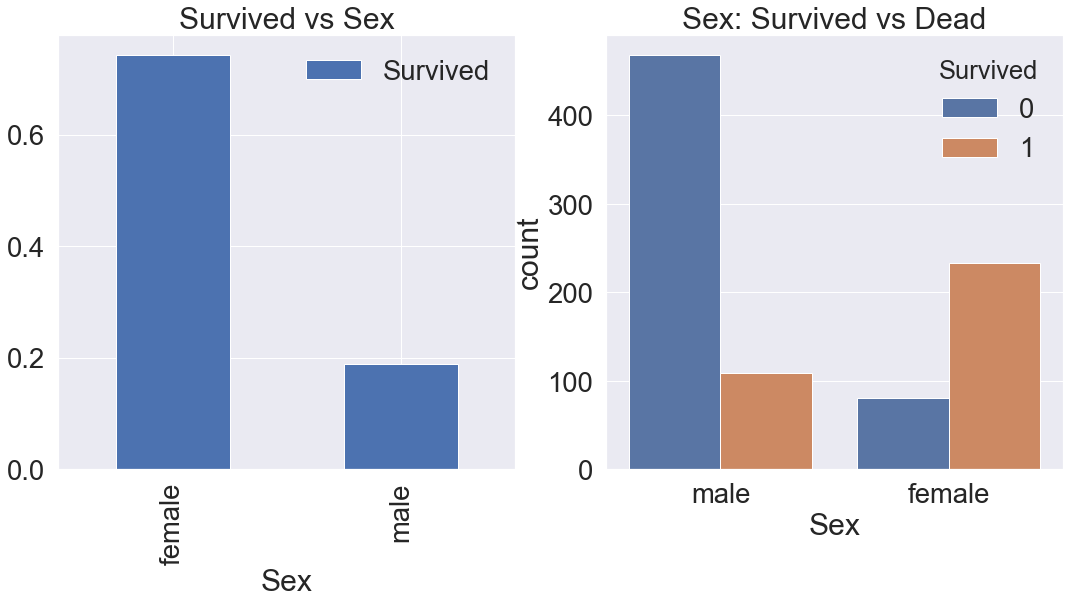

In [82]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

> 보시다시피, 여자가 생존할 확률이 높음.  
> Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있음

### 2.3 Both Sex and Pclass
이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는지 확인

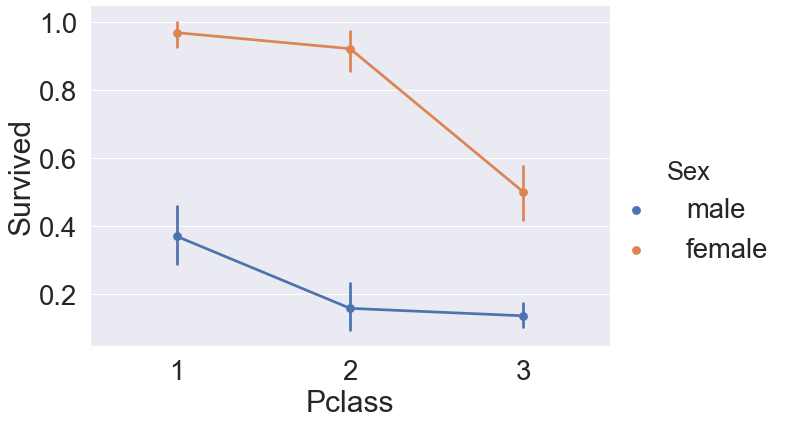

In [83]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 확인할 수 있음

In [84]:
a = df_train[['Survived', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex'], as_index=True)
a.mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

### 2.4 Age

In [85]:
print('제일 늙은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 늙은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


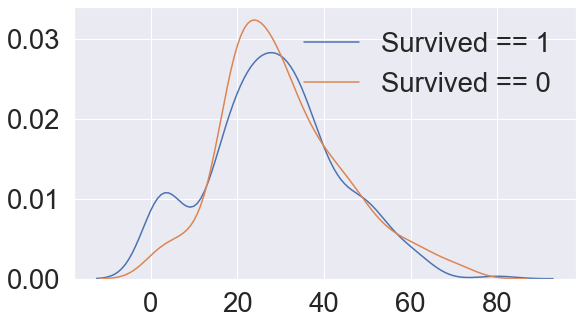

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

해당 히스토그램을 보시면 어린 나이 (약 15세 미만) 구간에서  
생존률이 상대적으로 높음을 확인할 수 있음

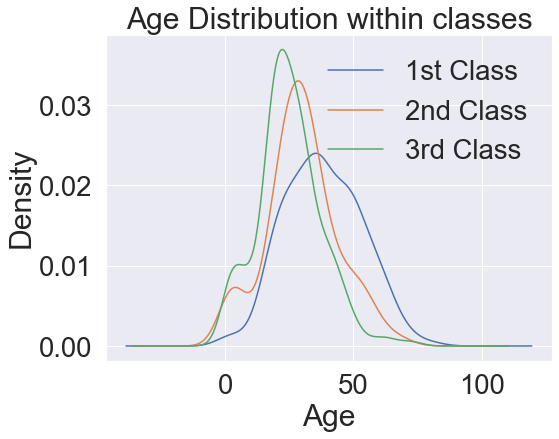

In [87]:
# Age distribution withing classes
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
                
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

위의 그래프 클래스가 높아질 수록, 나이 연령대가 높아짐을 확인할 수 있습니다.  
  
나이대가 높아질 수록 생존확률이 어떻게 달라지는지 알고 싶어져,  
누적 확률을 활용한 시각화를 해보았습니다.  

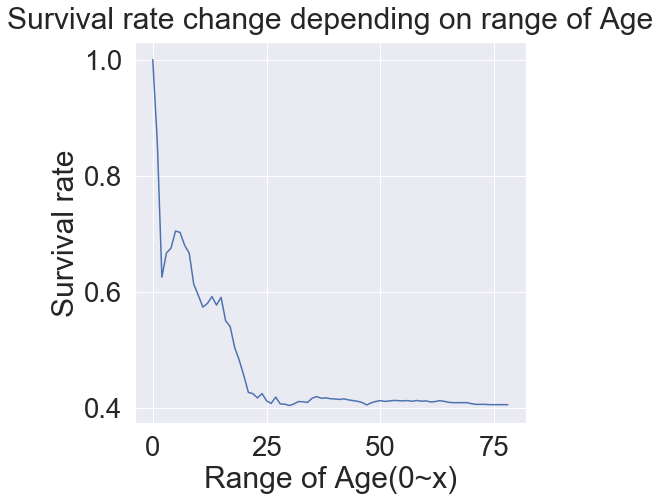

In [88]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() \
   / len(df_train[df_train['Age']< i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴수록 생존률이 확실히 높은 거슬 확인할 수 있습니다.  
이를 통해 나이도 중요한 피쳐임을 확인할 수 있습니다.  

지금까지 얻은 분석을 종합하자면,  
  
* 여자이거나  
* 나이가 어리고,
* 클래스가 높을 수록
생존확률이 높음을 확인할 수 있습니다.  

### 2.5 Embarked
Embarked 는 탑승한 항구를 나타낸다.

In [89]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [90]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

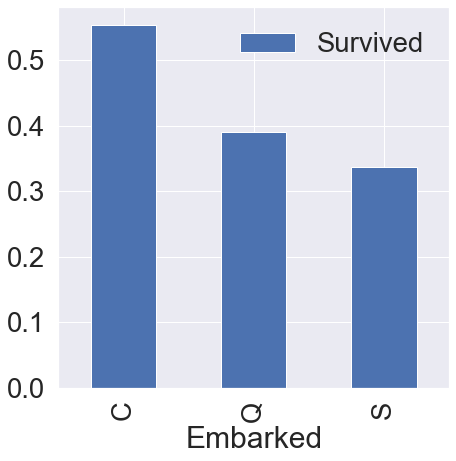

In [91]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

탑승한 곳에 따라 생존률의 차이가 많이 보이지는 않지만,  
그래도 차이가 있으니 피쳐로 사용해보겠습니다.  
  
그럼 다른 피쳐와의 상관관계도 한번 알아보도록 하겠습니다.  

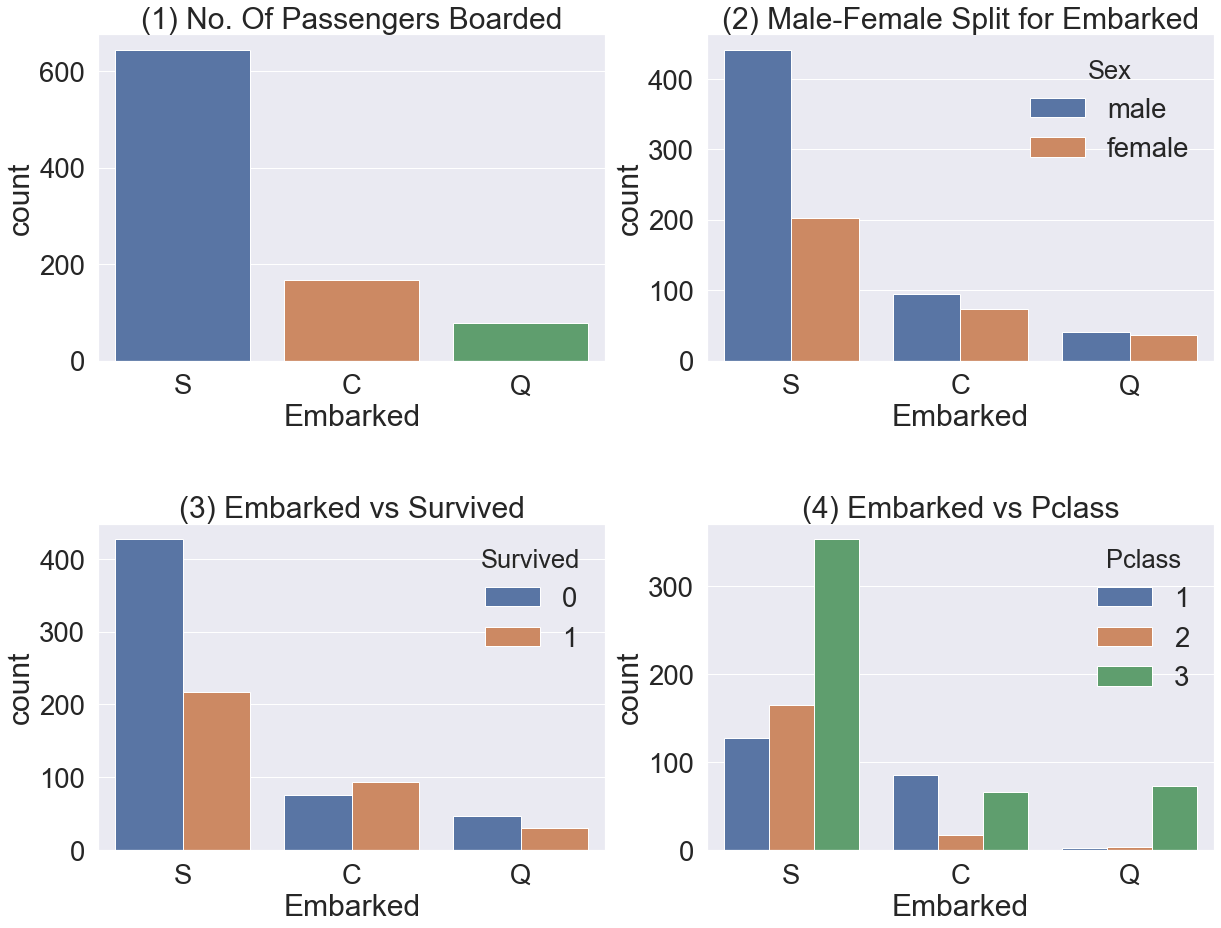

In [92]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) - 전체적으로 봤을 때, S 에서 가장 많이 탑승했습니다.
* Figure(2) - C 와 Q는 남녀 비율이 비슷하고, S 는 남자가 더 많습니다.
* Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼수 있습니다.
* Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd 클래스가 많아서 생존확률이 낮게 나옵니다.

### 2.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)
`SibSp`, `Parch` 를 합치면 함께 탑승한 가족의 수가 될 것입니다.  
이 두 피쳐를 더해서 새로운 피쳐 `FamilySize`를 만들어 보도록 하겠습니다.  

In [93]:
# 자신을 포함해야하니 + 1
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

In [94]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1


In [95]:
print('Maximum size of Family : ', df_train['FamilySize'].max())
print('Mean number of families: ', df_train['FamilySize'].mean())
print('Minimum size of Family : ', df_train['FamilySize'].min())

Maximum size of Family :  11
Mean number of families:  1.904601571268238
Minimum size of Family :  1


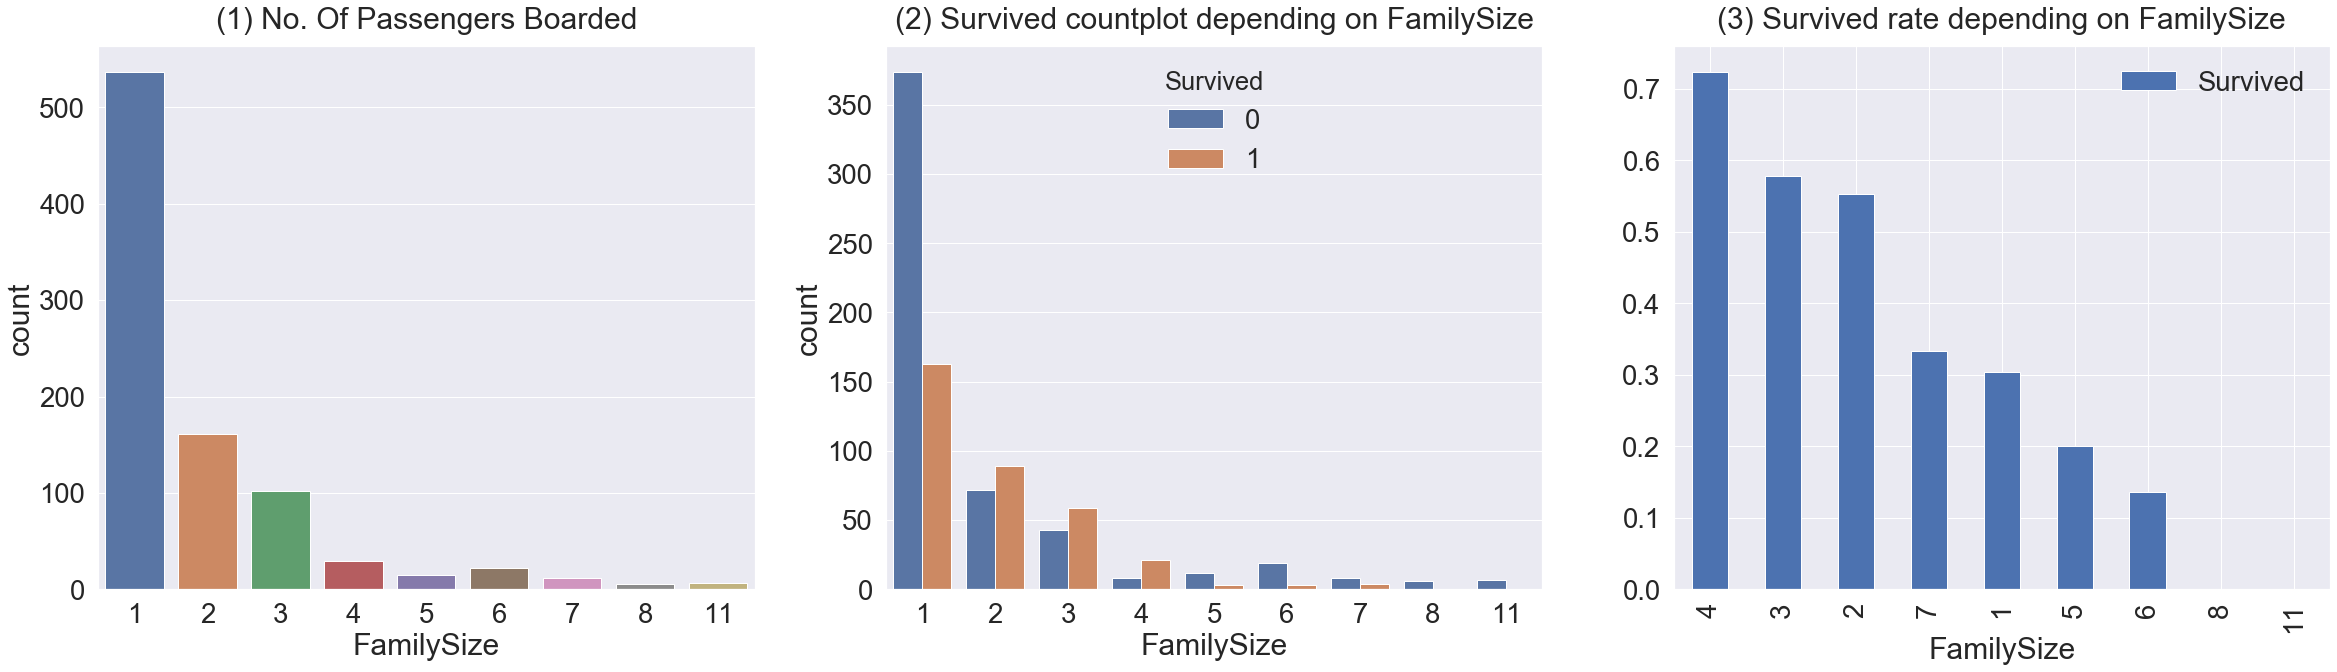

In [96]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)


plt.show()

* Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
* Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다,  
    가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요.  
    가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.


### 2.7 Fare
해당 피쳐는 탑승 요금입니다. 연속적인 데이터이므로 한번 histogram을 그려보도록 하겠습니다.

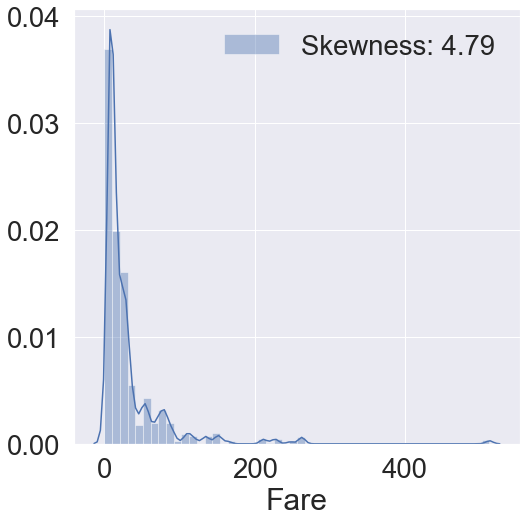

In [97]:
# skewenss = 비대칭도
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax = ax)
g = g.legend(loc='best')

In [98]:
# 특이하기도 train set 말고 test set에 
# Fare 피쳐에 널 값이 하나 존재하는 것을 확인할 수 있었습니다.
# 그래서 평균 값으로 해당 널값을 넣어줍니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

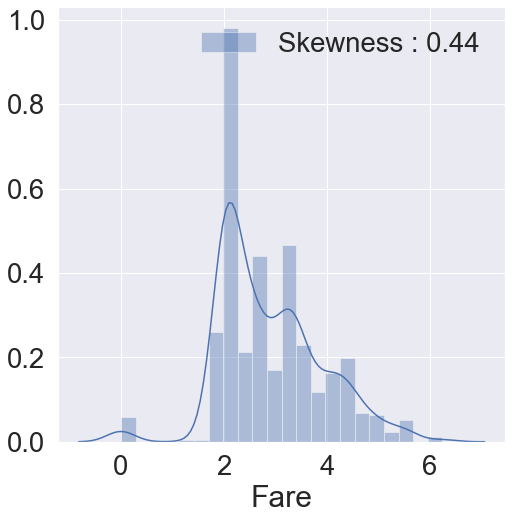

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')


log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.  
우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.  
사실 방금한 것은 `feature enginerring`에 들어가는 부분입니다.  
모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나,  
새로운 feature를 추가하는 것을 feature engineering 이라고 하는데,  
우리는 다음 챕터에 그것을 살펴볼 것입니다.  



### 2.8 Carbin
이 피쳐는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.  
그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [100]:
### Cabin Null 비율 계산
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [101]:
df_train.head()[['PassengerId', 'Cabin']]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


### 2.9 Ticket
이 피쳐는 NaN은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데. 이를 위해선 아이디어가 필요합니다.

In [102]:
df_train['Ticket'].value_counts()

347082              7
1601                7
CA. 2343            7
347088              6
3101295             6
                   ..
27267               1
2223                1
A/5 21173           1
STON/O2. 3101271    1
PC 17609            1
Name: Ticket, Length: 681, dtype: int64

보시다시피, ticket number 는 매우 다양합니다.  
우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?  
한번 생각을 해보시고 새로운 Feature를 만들어 모델의 성능을 끌어올리는 것도  
재밌는 데이터 분석 과정 중 하나니 힘내서 생각하시고 즐겨보시길 바랍니다!!  



## 3. 특성 공학 (Feature Engineering)

___"Garbage In, Garbage out"___

### 3.1 Fill Null
#### 3.1.1 Fill Null in Age using title

In [103]:
df_train['Age'].isnull().sum()

177

Age 에는 177개의 Null Data가 존재합니다.  
여기서는 `title + statics` 를 사용해 보겠습니다.
<br><br>
pands series에는 data 를 string 으로 바꿔주는 `str` 메소드와<br>
거기에 정규표현식을 적용하게 해주는 `extract` 메소드가 있습니다.<br>
이를 사용하여 title을 쉽게 추출할 수 있습니다.<br>
title을 `Initial` 컬럼에 저장하겠습니다.

In [104]:
# lets etract the Salutations
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

pandas crosstab을 이용하여 추출한 Initial 과 Sex 간의 count 를 확인

In [105]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [106]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [107]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


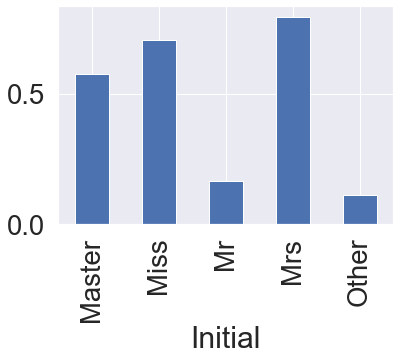

In [108]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다.  
statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를  
기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다.  
(딥러닝에서 디노이징 오토인코더 라는 것이 있습니다!)  

여기서는 statistics 를 활용하는 방법을 사용할 것입니다.  
여기서 statistics 는 train data 의 것을 의미합니다.  
우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며,  
train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.  

In [109]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [110]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Other'), 'Age'] = 46

In [111]:
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Other'), 'Age'] = 46

In [112]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [113]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

train & test 셋에 Age의 널처리가 완전히 끝난 것을 보실 수 있습니다.  

여기선 간단하게 Null을 채웠지만, 좀 더 다양한 방법을 쓴 예시들이 다른 커널에 존재합니다  
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 보시면서 공부해보세요!  



#### 3.1.2 Fill Null in Embarked

In [114]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null Values')

Embarked has  2 Null Values


Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로,  
간단하게 Null 을 S로 채우겠습니다.  

dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다.  
여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다.  

In [115]:
df_train['Embarked'].fillna('S', inplace=True)

In [116]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

### 3.2 Change Age(continuous to categorical)

Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만,  
Age를 몇개의 group 으로 나누어 category 화 시켜줄 수도 있습니다.  
continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있지만,  
본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.  

방법은 여러가지가 있습니다.  
dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고,  
아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.  

loc 예제는 위의 age mean 값을 채워 줬을 때 사용해 봤으므로,  
여기에선 apply를 사용해 보도록 하겠습니다.  

In [117]:
df_train['Age'].describe()

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [118]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    
    elif x < 70:
        return 6
    else:
        return 7
        

In [119]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [120]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

이제 파생 피쳐를 만들었으므로 원래 컬럼 Age 를 제거하는게 맞겠지만,  
저희는 상관 관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니  
남겨 보도록 하겠습니다.  

### 3.3 Change Initial, Embarked and sex (string to numerical)

현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다.  
이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때  
우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.  

map method 를 가지고 간단히 할 수 있습니다.  
사전 순서대로 정리하여 mapping 하겠습니다  

In [121]:
df_train['Initial'] = df_train['Initial'].map(
    {
        'Master' : 0,
        'Miss' : 1,
        'Mr' : 2,
        'Mrs' : 3,
        'Other': 4
    }
)
df_test['Initial'] = df_test['Initial'].map(
    {
        'Master' : 0,
        'Miss' : 1,
        'Mr' : 2,
        'Mrs' : 3,
        'Other': 4
    }
)

In [122]:
df_train['Embarked'] = df_train['Embarked'].map(
    {
        'C': 0,
        'Q': 1,
        'S': 2
    }
)
df_test['Embarked'] = df_test['Embarked'].map(
    {
        'C': 0,
        'Q': 1,
        'S': 2
    }
)

In [123]:
df_train['Embarked'].isnull().any(), df_train['Embarked'].dtypes

(False, dtype('int64'))

In [124]:
df_train['Sex'] = df_train['Sex'].map(
    {
        'female': 0,
        'male': 1
    }
)
df_test['Sex'] = df_test['Sex'].map(
    {
        'female': 0,
        'male': 1
    }
)

In [125]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
Initial          0
Age_cat          0
dtype: int64

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  Initial      891 non-null    int64  
 14  Age_cat      891 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 104.5+ KB


__널이 없고, int형으로 잘 바뀐 것으로 보아 잘 변환 되었음을 확인할 수 있습니다.__

이제 각 feature 간의 상관관계를 한번 보려고 합니다.  
두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다.  

-1로 갈수록 음의 상관관계,  
1로 갈수록 양의 상관관계를 의미하며  
0은 상관관계가 없다는 것을 의미합니다.  
따로 수식은 적지 않도록 하겠습니다. 검색만 하셔도 수식은 많이 나오니
궁금하시면 공부해보시걸 추천합니다!  

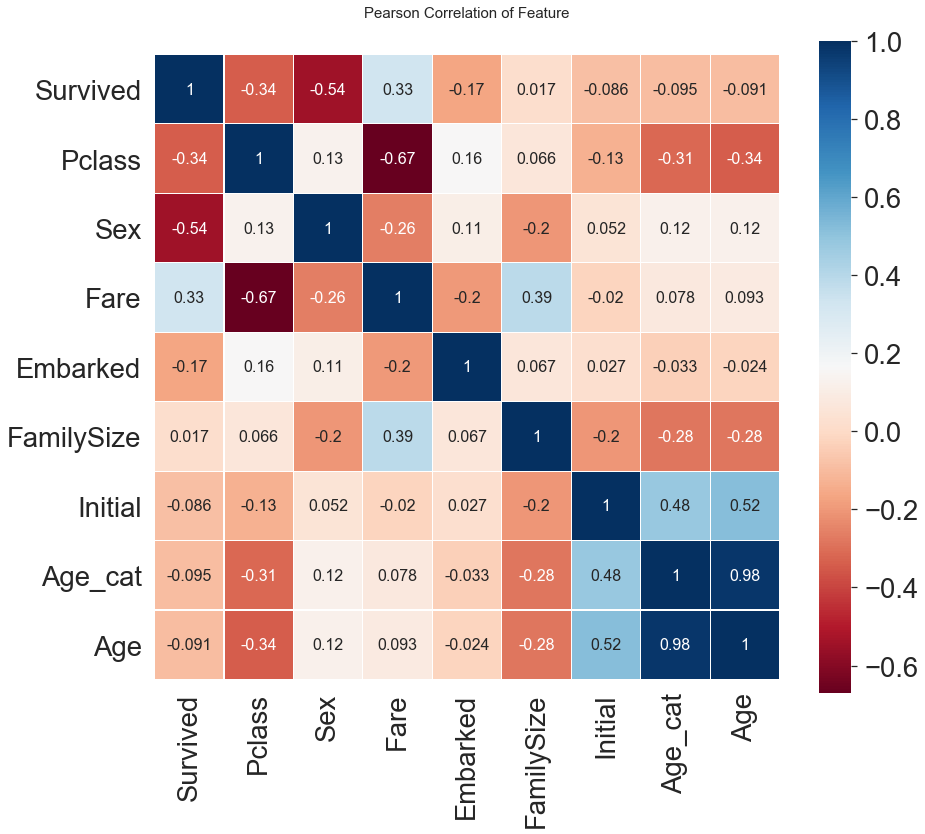

In [129]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Feature', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
del heatmap_data

EDA에서 살펴봤듯이,  
Sex, Pclass 가 Survived에 상관관계가 어느 정도 있음을 볼 수 있습니다.  
생각보다 Fare, Embarked도 상관관계가 있음을 볼 수 있습니다.  

또한 우리가 여기서 얻을 수 있는 정보는
서로 __강한 상관관계__를 가지는 feature들이 없다는 것입니다.  
(Age와 Age_cat제외)  
이것은 우리가 모델을 학습시킬 때, 불필요한 feature가 없다는 것을 의미합니다.  
__1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일거니까요.__  

이제 실제 모델을 학습시키기 앞서서 data preprocessing(전처리)를 진행해보겠습니다.

### 3.4 One_hot encoding on Initial and Embarked

수치화시킨 카테고리 데이터를 그대로 넣어도 되지만,  
모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있다.  

수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs ==3, Other == 4로 매핑해주는 것을 말합니다.  

One-hot encoding은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.


이렇게 하게 되면 각 클래스간 연관성을 Orthogonal(직교, 동일하게) 만들 수 있습니다.  
그래서 각 클래스 관의 상관 관계가 없어집니다.  

More?: 그냥 수치화 했을 경우 Master랑 Miss가 가까운 관계, Mrs와 Other이 가까운 관계로 해석될 수 있습니다.  
더 자세한 사항은 Label Encoding vs One-hot Encoding 으로 검색하시면 더 자세하게 알아 보실 수 있습니다.  
위와 같은 작업을 직접 코딩할 수도 있지만, pandas 의 get_dummies 를 사용하여 쉽게 해결 할 수 있습니다.  
총 5개의 카테고리니, one-hot encoding 을 하고 나면 새로운 5개의 column 이 생겨납니다.  
Initial 을 prefix로 두어서 구분이 쉽게 만들어 줍니다 .  

In [137]:
# 실행은 한 번만 됨
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

KeyError: "None of [Index(['Initial'], dtype='object')] are in the [columns]"

In [139]:
df_train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  Age_cat      891 non-null    int64  
 14  Initial_0    891 non-null    uint8  
 15  Initial_1    891 non-null    uint8  
 16  Initial_2    891 non-null    uint8  
 17  Initial_3    891 non-null    uint8  
 18  Initial_4    891 non-null    uint8  
dtypes: float

In [140]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  Age_cat      891 non-null    int64  
 13  Initial_0    891 non-null    uint8  
 14  Initial_1    891 non-null    uint8  
 15  Initial_2    891 non-null    uint8  
 16  Initial_3    891 non-null    uint8  
 17  Initial_4    891 non-null    uint8  
 18  Embarked_0   891 non-null    uint8  
 19  Embarked

아주 쉽게 one-hot encoding 을 적용했습니다.  
다른 패키지로도 원핫 인코딩을 적용 시킬 수 있지만, 여기에선 다루지 않겠습니다.  

Tips: 가끔 category 가 100개가 넘어가는 경우가 있습니다.  
이때 one-hot encoding을 사용하면 column이 100개가 생겨,  
학습시 매우 버거울 경우가 있습니다. (차원의 저주라고 부르기도 합니다.)  

이런 경우는 다른 방법을 사용하기도 하는데, 이는 나중에 다른 컴피티션 참가하시면  
차원의 저주 키워드로 해결 방법을 모색하시길 바랍니다!  


### 3.5 Drop columns
마지막으로 필요없는 피쳐를 없애버릴 차례입니다!

In [143]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [144]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [146]:
df_train.shape

(891, 15)

In [147]:
df_test.shape

(418, 14)

보시다시피, train 의 Survived feature(target class)를 빼면  
train, test 둘다 같은 columns 를 가진 걸 확인할 수 있습니다.